<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/impdsnetnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/New_256/Train'
test_dir = '/content/drive/MyDrive/New_256/Test'

Mounted at /content/drive


In [3]:
# Load DENSENET model for feature extraction
model = DenseNet121(weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 2s 0us/step


In [4]:
# Function to extract features from an image
def extract_features_Densenet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 174ms/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 424ms/step


Training Bernoulli Naive Bayes for DenseNet...
Performance metrics for Bernoulli Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.37      0.39       500
           1       0.40      0.40      0.40       500
           2       0.49      0.19      0.27       500
           3       0.30      0.42      0.35       500
           4       0.45      0.63      0.53       500

    accuracy                           0.40      2500
   macro avg       0.42      0.40      0.39      2500
weighted avg       0.42      0.40      0.39      2500

Accuracy: 0.4004
Sensitivity: 0.4004
Precision: 0.41519795018072836
F1 Score: 0.3894724832958566
Specificity: 0.4004
Recall: 0.4004



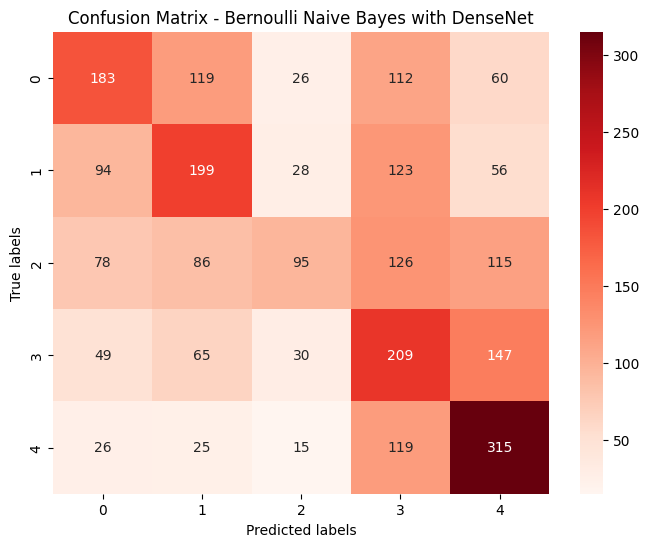

Training Multinomial Naive Bayes for DenseNet...
Performance metrics for Multinomial Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.39      0.40       500
           1       0.38      0.37      0.37       500
           2       0.40      0.16      0.23       500
           3       0.31      0.41      0.35       500
           4       0.47      0.62      0.54       500

    accuracy                           0.39      2500
   macro avg       0.39      0.39      0.38      2500
weighted avg       0.39      0.39      0.38      2500

Accuracy: 0.3904
Sensitivity: 0.39039999999999997
Precision: 0.3924434564648617
F1 Score: 0.3776921469591786
Specificity: 0.39039999999999997
Recall: 0.39039999999999997



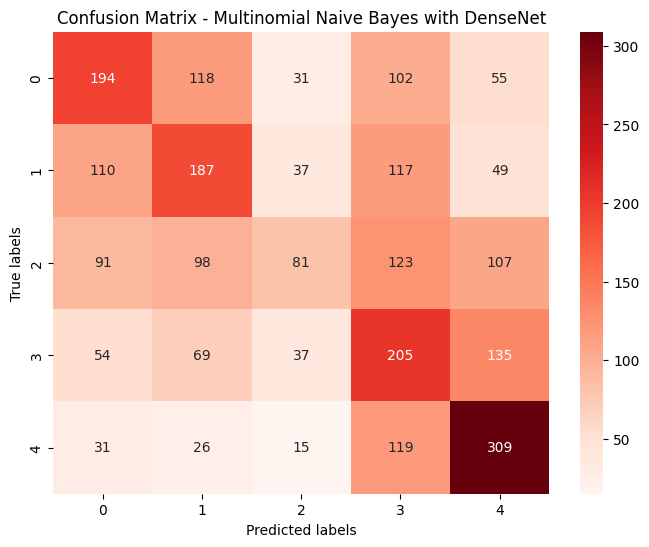

Training Complement Naive Bayes for DenseNet...
Performance metrics for Complement Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.41      0.41       500
           1       0.37      0.32      0.34       500
           2       0.49      0.06      0.10       500
           3       0.32      0.37      0.34       500
           4       0.40      0.73      0.52       500

    accuracy                           0.38      2500
   macro avg       0.40      0.38      0.34      2500
weighted avg       0.40      0.38      0.34      2500

Accuracy: 0.3788
Sensitivity: 0.37879999999999997
Precision: 0.396815714443607
F1 Score: 0.343211389289987
Specificity: 0.37879999999999997
Recall: 0.37879999999999997



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


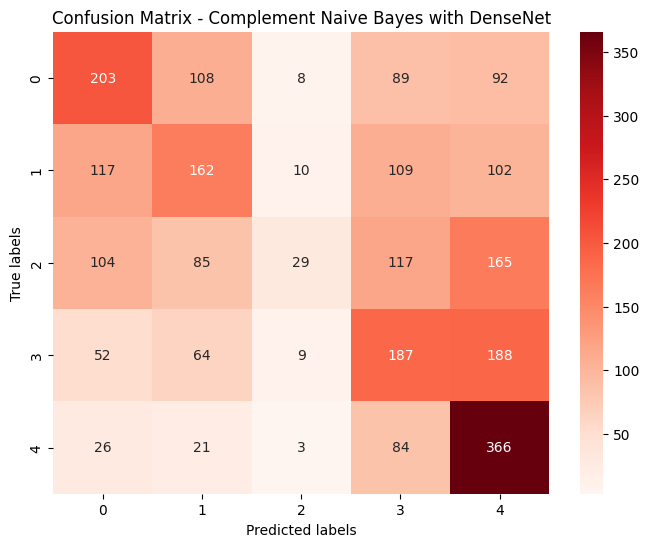

Training Gaussian Naive Bayes for DenseNet...
Performance metrics for Gaussian Naive Bayes with DenseNet:
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.55      0.52       500
           1       0.53      0.44      0.48       500
           2       0.69      0.31      0.43       500
           3       0.41      0.58      0.48       500
           4       0.57      0.63      0.60       500

    accuracy                           0.51      2500
   macro avg       0.53      0.51      0.50      2500
weighted avg       0.53      0.51      0.50      2500

Accuracy: 0.5056
Sensitivity: 0.5056
Precision: 0.5336036566055106
F1 Score: 0.5011002800428426
Specificity: 0.5056
Recall: 0.5056



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


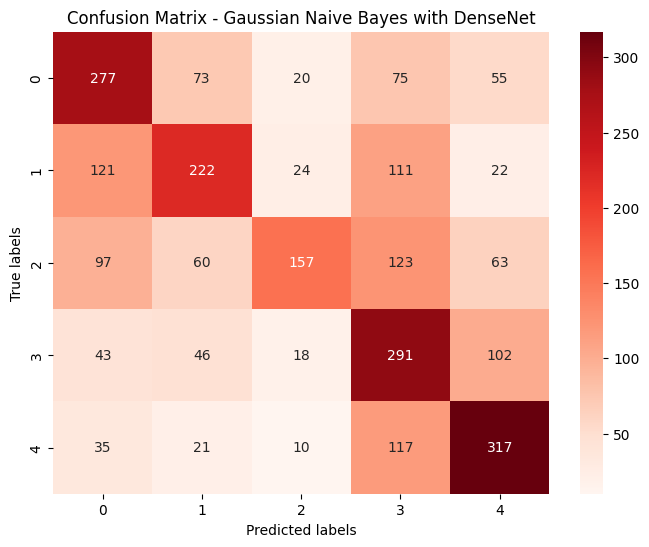

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from tensorflow.keras import layers
import torch
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Flatten the features for B2
x_train_flat_b2 = np.array([feature.flatten() for feature in x_train])
x_test_flat_b2 = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1] for B2
scaler_b2 = MinMaxScaler()
x_train_scaled_b2 = scaler_b2.fit_transform(x_train_flat_b2)
x_test_scaled_b2 = scaler_b2.transform(x_test_flat_b2)

# Ensure non-negative values for B2
min_value_b2 = np.min(np.concatenate([x_train_scaled_b2, x_test_scaled_b2]))
x_train_scaled_non_negative_b2 = x_train_scaled_b2 - min_value_b2
x_test_scaled_non_negative_b2 = x_test_scaled_b2 - min_value_b2

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for DenseNet...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b2, y_train)
    # Predict on test set
    y_pred_b2 = clf.predict(x_test_scaled_non_negative_b2)
    # Print performance metrics
    print(f'Performance metrics for {clf_name} with DenseNet:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred_b2))  # Corrected variable names

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred_b2)  # Corrected variable names
    sensitivity = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    precision = metrics.precision_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    f1 = metrics.f1_score(y_test, y_pred_b2, average='macro')  # Corrected variable names
    specificity = metrics.recall_score(y_test, y_pred_b2, average='macro', pos_label=0)  # Specificity
    recall = metrics.recall_score(y_test, y_pred_b2, average='macro')  # Recall

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Specificity: {specificity}')
    print(f'Recall: {recall}\n')

    # Confusion matrix
    cm_b2 = confusion_matrix(y_test, y_pred_b2)  # Corrected variable names

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b2, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with DenseNet')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
